In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
%matplotlib inline

data = pd.read_csv('/Users/peter/Desktop/Data_science_machine_learning/hw2data.csv',index_col=0)
data.head()

y = data.y
x = data.drop(labels='y', axis = 1)

/Users/peter/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.000776050333513


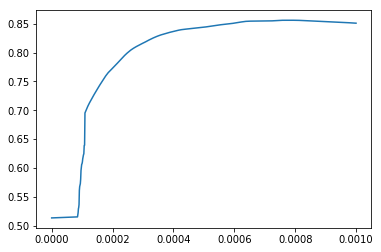

In [ ]:
scaler = StandardScaler()
x = x.as_matrix().astype(np.float)
x = scaler.fit_transform(x)

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Take the range of alpha
alphas = np.logspace(-8,-3,1000)
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    # Train the model using the training sets
    regr.fit(x_train, y_train)
    scores.append(regr.score(x_test,y_test))
plt.plot(alphas,scores)

best_a=alphas[np.argmax(scores)]
print (best_a)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(2, 1, 1)

# Fill these in

train_errors=[]
test_errors=[]

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(x_train, y_train)
    train_errors.append(regr.score(x_train, y_train))
    test_errors.append(regr.score(x_test, y_test))

plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(best_a, plt.ylim()[0], np.max(test_errors), color='r',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()

regr = Lasso(alpha = best_a)
regr.fit(x_train,y_train)

R2_train = regr.score(x_train,y_train)
R2_test = regr.score(x_test,y_test)
coef = regr.coef_

plt.plot(coef, label='Optimal Parameter')

plt.legend()
plt.show()

/Users/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
regr = Lasso(alpha=best_a)
regr.fit(x_train,y_train)
coefficient = np.sort(np.array(regr.coef_))
plt.xlabel('Parameters')
plt.ylabel('Performance')
plt.bar(range(499), coefficient)
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
regr = Lasso(alpha=best_a)
scores = cross_val_score(regr, x, y, cv=5)
plt.xlabel('l')
plt.ylabel('R^2')
plt.title('Performance on 5 folds =' + str(best_a))
plt.bar(range(1,6),scores)
plt.show()

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2)
scorecv = cross_val_score(regr, x, y, cv=cv)
plt.bar(range(1, 6), scorecv)
plt.title('Random cross validation scores')
plt.show()

In [ ]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        x_train, x_test = x[train_index], x[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(x_train,y_train)
        y_pred[test_index] = clf.predict(x_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()

x_scaled = scaler.fit_transform(x)

coeffs=run_cv_coeffs(x_scaled,np.array(y),Lasso,alpha=best_a)

In [ ]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(x))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(x))]
    x_columns_values = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(x))]
    return coeffs_avgd, coeffs_std, x_columns_values
coeffs_avg,coeffs_std,x_columns_values=get_coeffs(coeffs)

dfCoeffs = pd.DataFrame({'type':x_columns_values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))